# 21点游戏的蒙特卡洛学习策略迭代

## 蒙特卡罗控制

In [1]:
from blackjack import Player, Dealer, Arena
from utils import str_key, set_dict, get_dict
from utils import draw_value, draw_policy
from utils import epsilon_greedy_policy
import math

In [2]:
class MC_Player(Player):
    '''具备蒙特卡罗控制能力的玩家
    '''
    def __init__(self, name = "", A = None, display = False):
        super(MC_Player, self).__init__(name, A, display)
        self.Q = {}   # 某一状态行为对的价值，策略迭代时使用
        self.Nsa = {} # Nsa的计数：某一状态行为对出现的次数
        self.total_learning_times = 0
        self.policy = self.epsilon_greedy_policy # 
        self.learning_method = self.learn_Q # 有了自己的学习方法
    
    def learn_Q(self, episode, r): # 从状态序列来学习Q值
        '''从一个Episode学习
        '''
        #for episode, r in episodes:
        for s, a in episode:
            nsa = get_dict(self.Nsa, s, a)
            set_dict(self.Nsa, nsa+1, s, a)
            q = get_dict(self.Q, s,a)
            set_dict(self.Q, q+(r-q)/(nsa+1), s, a)
        self.total_learning_times += 1
    
    def reset_memory(self):
        '''忘记既往学习经历
        '''
        self.Q.clear()
        self.Nsa.clear()
        self.total_learning_times = 0

    
    def epsilon_greedy_policy(self, dealer, epsilon = None):
        '''这里的贪婪策略是带有epsilon参数的
        '''
        player_points, _ = self.get_points()
        if player_points >= 21:
            return self.A[1]
        if player_points < 12:
            return self.A[0]
        else:
            A, Q = self.A, self.Q
            s = self.get_state_name(dealer)
            if epsilon is None:
                #epsilon = 1.0/(self.total_learning_times+1)
                #epsilon = 1.0/(1 + math.sqrt(1 + player.total_learning_times))
                epsilon = 1.0/(1 + 4 * math.log10(1+player.total_learning_times))
            return epsilon_greedy_policy(A, s, Q, epsilon)


In [3]:
A=["继续叫牌","停止叫牌"]
display = False
player = MC_Player(A = A, display = display)
dealer = Dealer(A = A, display = display)
# 创建一个场景
arena = Arena(A = A, display=display)

In [4]:
arena.play_games(dealer = dealer, player = player,num = 200000, show_statistic = True)

100%|██████████| 200000/200000 [00:41<00:00, 4779.03it/s]

共玩了200000局，玩家赢84779局，和17028局，输98193局，胜率：0.42,不输率:0.51


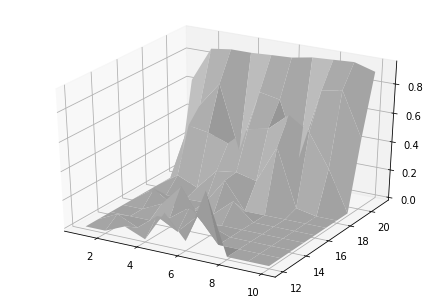

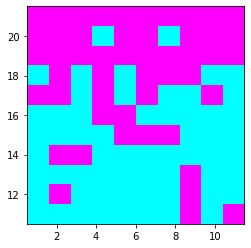

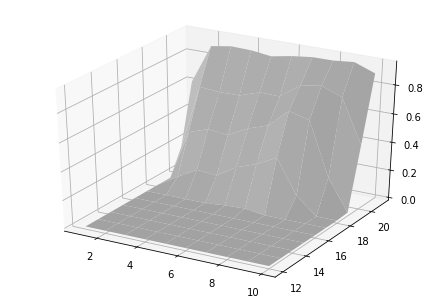

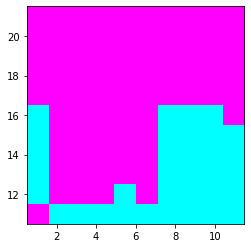

In [5]:
draw_value(player.Q, useable_ace = True, is_q_dict=True, A = player.A)
draw_policy(epsilon_greedy_policy, player.A, player.Q, epsilon = 1e-10, useable_ace = True)
draw_value(player.Q, useable_ace = False, is_q_dict=True, A = player.A)
draw_policy(epsilon_greedy_policy, player.A, player.Q, epsilon = 1e-10, useable_ace = False)

In [ ]:
display = False
arena.display = display
player.display = display
dealer.display = display
arena.play_games(dealer,player,num=10000, show_statistic = True)

In [ ]:
display = True
arena.display = display
player.display = display
dealer.display = display
arena.play_games(dealer,player,num=10, show_statistic = True)